> # Project 02 - Wrangle and Analyze Data


Report prepared by: Calvin Baraka    
Project: Wrangle and Analyze Data  

***

> ## Table of Contents
<ul>
<li><a href="#Executive Summary">Executive Summary</a></li>
<li><a href="#Introduction">1. Introduction</a></li>
<li><a href="#Gathering of Data">2. Gathering of Data</a></li>
<li><a href="#Assessment of Data">3. Assessment of Data</a></li>
<li><a href="#Cleaning of Data">4. Cleaning of Data</a></li>
<li><a href="#Analysis and Visualizaton of Data<">5. Analysis and Visualizaton of Data</a></li>
<li><a href="#Conclusions Drawn">6. Conclusions Drawn</a></li>
<li><a href="#References">7. References</a></li>
</ul>

***

> ## Executive Summary: <a id='Executive Summary'></a>

The project aimed to give to the student a real case of how to gather, assess, clean, and analyze the data, in other words its englobes the Data Wrangling and Exploratory Data Analysis. The database used as an example is about the [@dog_rate][dog_rate] user from Twitter, as known as [WeRateDogs™][dog_rate], this account has more than 7,572,000 followers, 9,500 tweets, and 141,000 likes.

The Data Gathering process bundled three different tasks, the first one download file from URL and later loading to the Jupyter Notebook, which requires a manual step, the second downloading a file programmatically, and the third gathering data from the Twitter API. This step has also required to save these data in a local machine.

The final data frame was stored as `twitter_archive_master.csv`.

In the Data Analysis and Visualization, which I have interpreted as Exploratory Analysis, I have posed few questions to guide my analysis, which lead me to found strong evidence of:

* Seasonality in the number of tweets along the week and along the year;
* A positive correlation between the number of retweets and the number of favourites, and;
* No correlation between the algorithms output used to predict the dog breed.

Inferences drawn from the data include:
* correlation between the retweet_count and favourite_count are positively correlated
* the Golden Retriever and Labrador Retriever were the most popoular dog breeds

> ## 1. Introduction  <a id='Introduction'></a>

This Jupyter Notebook aims to document the process of Gathering, Assessing, and Cleaning of Data Science Foundations II Nanodegree Program Project 02.

#### For this project the softwares used were:
* VS Code
* Anaconda3 Base Python v.3.9.12


N/B. all references will be listed at the end of the project that is all websites accesssed and videos used for reference



> ### 1(a). Reproducibility and Future Proofing
This project will be published as a .ipynb code document to enable for it to be reproduced in future instances. I will try my level best to document each step used in the analysis and explain what each step entails and what goals were achieved in each step.
The document will also be published in pdf and I will pose research questions to be answwered in this document so as to guide the nalysis process. 
The cleaning process will als be highlighted with any issues encountered clearly highlighted and worked on.


#### Repository

You can access all files of this report in this repository:

* #https://github.com/Barakacalvin/Udacity-Data-Analyst---Analyze-Twitter-Data.git

### Other key deliverables can be accessed fron the following links:
* Act Report and;
* Wrangle Report

[dog_rate]: https://twitter.com/dog_rates







> ### 1(b) Importing Libraries

A couple of libraries will be used to manage the data that will be gathered. Notably is the Tweepy library thatenables us to work with the Twitter API. any library that I didnt have before was installed prior to this final report. For reference purposes, the liraries used are:
* Pandas
* Matplotlib
* Numpy
* os
* Tweepy
* Requests
* Seaborn
* re
* json
* time

In [2]:
# Importing Library.

# Importing pandas to work with DataFrames.
import pandas as pd
pd.set_option('mode.chained_assignment','raise')

# Importing numpy to general methods.
import numpy as np

# Importing the time package to calculate the elapse time to access the Twitter API
import time

# We import seaborn to enable us to get better vizualisations.
import seaborn as sns

# Importing the re package to use the regular expressions.
import re

# The OS package enables us to write and open files.
import os

# Requests enables us to create a object from a given URL.
import requests

import tweepy # Importing the Client Code to use the Twitter API.
from tweepy import OAuthHandler

import json # Json eases the workaround json files
from timeit import default_timer as timer


# matplotlib enables us ro run grapical outputs while inline prints the outputs in the document.
import matplotlib.pyplot as plt
%matplotlib inline


***

> ## 2. Data Gathering <a id='gathering'></a>

This project requires the use of a couple of datasets provided by Udacity. the following datasets are provided by udcity and will have to be gathered and stored locally. 

* `image-predictions.tsv`, and; `twitter-archive-enhanced.csv`. The project wll als require us to access the twitter API in order to garther additional data to be used alongside the provided data in order to avail for proper and indepth analysis amd also enable us to draw conclusions that are well researched and supported by indepth analysis.

First, I will create a folder to store the data and later I will download each file.

> ### 2a. Downloading data from Udacity

For this section we will download data the data that will be used in the project. The data is hosted in the the Udacity website and will be downloaded programatically.
* we'll create folders to host the data and download the needed files into the folder
* we'll also access the twitter API in order to create the tweet_jason.txt and clean the data.

In [3]:
# First we will create a list of files to be downloaded:
urls_list = ['https://video.udacity-data.com/topher/2018/November/5bf60c1e_twitter-archive-enhanced-2/twitter-archive-enhanced-2.csv',
            'https://video.udacity-data.com/topher/2018/November/5bf60c69_image-predictions-3/image-predictions-3.tsv']

# We will then create the folder where the dataset will be downloaded and saved. The code will check for the existence of the file and if not pesent,
# the codeblock below will create a file
fl_name = 'Twitter Dataset'
if not os.path.exists(fl_name): 
    os.mkdir(fl_name)


# we will then create a loop that will download the files from the URLS listed above.
for lnk in urls_list:
    if not lnk.split('/')[-1].replace('-','_') in os.listdir(fl_name):                              # Check if the files already exist.
        feedback = requests.get(lnk)                                                               # Creating an object of the given URL.
        with open(os.path.join(fl_name,lnk.split('/')[-1].replace('-','_')), mode = 'wb') as file:  # Defining the file name.
            file.write(feedback.content)                                                           # Saving the object.



 We need to load the downloaded files into the jupyter notebook. The files are currently saved in the local machine at the Twitter `Dataset folder`. 
*  To note is that the Image predictions file is a `.tsv files` (separated by tabs) and we need to read it as such. while the other is a regular csv file
*  For both these files we use foward slashes instead of backs lashes in order to avoid the occurence of a syntax erros that would occur if the latter was used that is `(SyntaxError: (unicode error) 'unicodeescape' codec can't decode bytes in position 2-3: truncated \UXXXXXXXX escape)`.

In [4]:
# Loading the WeRateDogs archive.
df_arch = pd.read_csv("C:/Users/calvi/OneDrive/Documents/Jupyter Notebooks/Udacity/Datat science foundations 2/Twitter Dataset/twitter_archive_enhanced_2.csv") 

# Loading the Image predictions (.tsv file)  
df_image = pd.read_csv('C:/Users/calvi/OneDrive/Documents/Jupyter Notebooks/Udacity/Datat science foundations 2/Twitter Dataset/image_predictions_3.tsv', sep = '\t') 

df_arch.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [5]:
df_image.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


> ### 2b. Twitter API & JSON

As a requirement, the project requires for us to create the `tweet_json.txt` and consequently complete some missing and wrong values of the same file. Through online research, I found out that the easiest packages to use is the `tweepy package` and the `Twython package` that is a client code that accesses the Twitter API. 
The package that we'll use is the `tweepy package`
The package was installed earlier trough the terminal using the Terminal by caling the `pip install` command.

#### tweet_json access
To access the the data  from twitter, we'll access the specific tweets using their id with the `statuses/show/:id API route`. 
we'll use the following to fill up our data:
* `consumer_key` 
* `consumer_secret` 
* `access_token` 
* `access_secret`

This will enable us to gather data that is missing from the `twitter_archive_enhanced.csv` file. This fills in the gaps and allows us to have credible and verifiable results.

<em> N/B.: The above authentification chunk of code has a default configuration of the API,  the [`wait_on_rate_limit`][tweet], is set as `True`.</em>

[tweet]: https://www.loginradius.com/blog/engineering/beginners-guide-to-tweepy/#:~:text=But%20keep%20in%20mind%20that,anything%20above%20that%20an%20error.

<em> For reference, the following [tweepy documentation][tweepy_docs] was accessed and used for reference.<em>

[tweepy_docs]: https://docs.tweepy.org/en/stable/api.html

We need to identify `unique tweet_id` from the `df_arch` database so as to reduce time taken to loop through the tweets to return a json text document.
This also reduces unnecessary repetitions.

This will then be appended into a list for iteration later.

In [6]:
# getting unique twitter ids.
uniq_id = df_arch.tweet_id.tolist()

# Print the number of unique tweets.
print("We have {} unique tweet IDs." .format (len(uniq_id)))

We have 2356 unique tweet IDs.


In [7]:
uniq_id[:5] #prints the first 5 unique ids

[892420643555336193,
 892177421306343426,
 891815181378084864,
 891689557279858688,
 891327558926688256]

> ### NOTE:
* We will the use the Unique IDs to then download the tweepy status object based on tweet ids and then store in another list containing tweets fetched.
* we also need to check the time taken to run the loop
* To note is that twitter has a rate limit and considering we have 2356 ubique tweet ids, this will probably raise the `TweepError` requiring the API to wait some minutes before resuming gathering data.
* Twitter has a charecter limit of 280 characters this is an increase from the previous 140 characters. We will need to figure out how to get the entire tweet without the epipsis `(...)` at the end of the tweet.
<em> For this we will use the `tweet_mode='extended'` function. This is referenced from this [link][tweepy_extended] <em>

[tweepy_extended]: https://docs.tweepy.org/en/stable/extended_tweets.html

In [8]:
# we'll comlete with keys and secrets from our data.
#client = tweepy.Client(
#    bearer_token ="AAAAAAAAAAAAAAAAAAAAAMtJhAEAAAAAuA%2FarpWYmiyJXimznQ1%2BAmmy%2FBw%3DtpSZM3J3627IGyHKNdxQGljvJyyYkWLhHcuGTKx7bo8PkxrAD6"
#    access_token = 'kcP9RYj5JUZO40nq4kEvQfvZe'      # API key
#    consumer_secret = 'Y6ehg3pU9u1OJj1QNvBICp0DikiF3dP8wlZ8dwgJ0Gy10VL32g'   # API secret key
#    consumer_key = '1092337801-EY9faztLOCn4Ma2IiEX4e5ARyg7dODCNgdbMy1s'      # Access token
#    access_secret = 'Sd28Gv2cpjHlzMEN8nqMP5W7sqtFaeuSn5Lva3CfXNnJx'     # Access token secret
#)
# token for twitter developers
#client = tweepy.Client(
#    bearer_token='',
#    consumer_key="",
#    consumer_secret="",
#    access_token="",
#    access_token_secret="",
#)
#tweet_dct = {}
#tweet_dct = client.get_tweet(id=uniq_id,wait_on_rate_limit = True,  
#                                    tweet_mode = 'extended')
#Authentification: 
#auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)
#api = tweepy.API(auth, 
#                 parser = tweepy.parsers.JSONParser(), 
#                 wait_on_rate_limit = True)

#auth = tweepy.OAuthHandler('5Uur0mo4ol2kB8yhtZ1VxXS0u', 'h8E7fSpXWiMoBel7G1ZOAeu4Mgru0v0MtxH5ehYE1RKM89SiBH')
#auth.set_access_token('303562412-ct9aNnU0FQR0UKJVn1i1W3Y8omqSewiQWUcRaygB', 'D3qslrbdOU5fqTOp951kOIuZbkeTPBodnjNYoEGFR63Ft')
#api = tweepy.API(auth, 
#                 parser = tweepy.parsers.JSONParser(), 
#                 wait_on_rate_limit = True, 
#                 wait_on_rate_limit_notify = True)

In [9]:

#access_token = ''      # API key
#consumer_secret = ''   # API secret key
#consumer_key = ''      # Access token
#access_secret = ''     # Access token secret

In [10]:
# Authentication (default configuration).
#auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)
#api = tweepy.API(auth, wait_on_rate_limit = True)

#### The following code block was run and consequently returned errors in that there was no tweet associated with the Unique IDs:


In [11]:

# Dict to store twitter data
#rawtwt_dct = {} 
# This is the list of errors.
#df_err = [] 
# Current time when the Twitter API starts.
#start = time.time() 

##### Loop to find each tweet_id of uniq_id list.
#for tweet in uniq_id:
     #This is necessary to avoid an interruption if any tweet_id is not find.
#    try:
        # The get_status will find a specific tweet_id and return all the tweet.
#        twt_status = api.get_status(tweet,tweet_mode = 'extended')           
        # The data I want is the -json dictionary.
#        rawtwt_dct[str(tweet)] = twt_status._json                     # -json is a dictionary.
    # In case of a problem, a message will be printed.
#    except:
#        df_err.append(str(tweet))                                    # Update df_err list.
#        print("tweet of id {} was not found" .format(str(tweet)))

# Current time when the Twitter API ends.
#end = time.time()

# this stops the timer            
#end = time.time()

#print(end - start)

In [12]:
# Writing the tweet_json.txt in the Twitter Dataset folder.
#with open('Twitter Dataset/tweet_json.txt', mode = 'w') as file:
#    json.dump(rawtwt_dct, file)

In [13]:
# Loading the tweet_json.txt as a panda DataFrame.
#df_api = pd.read_json('Twitter Dataset/tweet_json.txt', orient = 'index') # Atention to the orient defined as index.

# Printing the first 2 rows.
#df_api.head(2)

* The total running time of the codeblock was around 27 minutes and returned an empty list. 
* I therefore decided to download the data and open the data locally. With the codeblock below to avoid erors that were constantly coming up.

Upon further consultation I realised that I hadn't applued for twitter API Keys hence the method wouldnt work.

`Update: I got my api keys but still tweets were not found`

I therefore shifted my focus to downloading the json file and extracting the data 

In [14]:
api_data = []


with open("tweet-json.txt", "r") as f: #read the downloaded file
    for line in f:
        try: 
            tweet = json.loads(line) #append a dictionary to the created list           
            api_data.append({
                "tweet_id": tweet["id"],
                "retweet_count": tweet["retweet_count"],
                "favorite_count": tweet["favorite_count"],
                "retweeted": tweet["retweeted"],
                "display_text_range": tweet["display_text_range"]                
            })               
                
           #tweet["entities"]["media"][0]["media_url"]
        except:
            print("Error.") 
            
df_api = pd.DataFrame(api_data, columns = ["tweet_id", "retweet_count", "favorite_count", "retweeted", "display_text_range"])

Finally, I have gathered all three datasets:

* `tweet_json.txt` as `df_api`;
* `image_predictions.tsv` as `df_image`, and;
* `twitter_archive_enhanced.csv` as `df_arch`.

***

> ## 3. Assessment of Data <a id='Assessment of Data'></a>

Data can have issues that can broadly be categorized in two broad categories that is Quality and Tidiness:

* Quality issues: Dirty data;
* Completeness: missing data?
* Validity: does the data make sense?
* Accuracy: inaccurate data? (wrong data can still show up as valid)
Consistency: standardization?
* Tidiness Issues:
* Structural issues.

from the project rubric, we are supposed to have:
At least eight (8) data quality issues and two (2) tidiness issues are detected, and include the issues to clean to satisfy the Project Motivation. Each issue is documented in one to a few sentences each._
I will do an assesment of the data both programatically and visually to detect and document issues that require cleaning. I will do tha for each dataset separately and proceed on to the cleaning process.


`We'll do the assessments across the 3 different datasets looking for any issues arising;`
* df_arch
* df_image
* df_api

> ### 3a. DF_ARCH

> ##### i) `Taking snippets of the data using the head and/or tail methods`
We'll start with the df_arch dataset which is the twitter archive dataset provided. Here we'll be looking for issues with the dataset 

In [15]:
# Print the first 3 rows of the df_arch data set.
df_arch.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


`Well run the .head() method on the df_image to display the first three rows off the data and check for any issues`


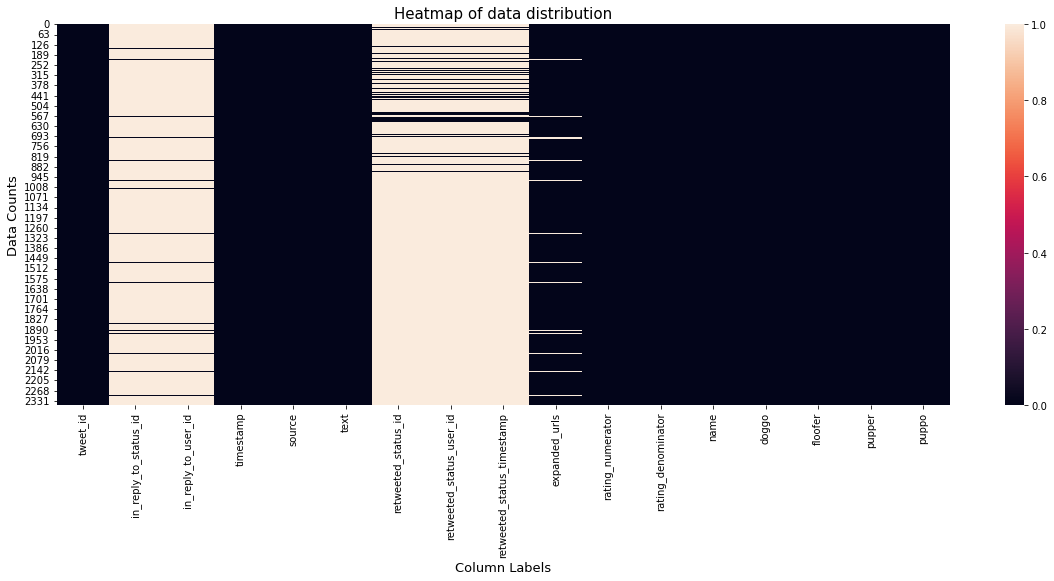

In [16]:
fig, ax = plt.subplots(figsize = (20,7))
ax = sns.heatmap(df_arch.isnull(), vmin=0, vmax = 1)
plt.title('Heatmap of data distribution', color = 'black', fontsize = '15')
plt.xlabel('Column Labels', color = 'black', fontsize = '13')
plt.ylabel('Data Counts', color = 'black', fontsize = '13');

As can be visibly seen, there are columns that have alot of missing data and will have to be dropped. That is according to this heatmap the lighter areas in the data

In [17]:
df_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [18]:
# What is the most commom name to a Dog!?
df_arch["name"].value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

The `.value_counts()` method applied to the `name`'s columns shows a higher number of weird and probably wrong dogs names.

* 745 occurences on None;
* 55 occurrences of a;
* 8 occurrences of the;
* 7 occurrences of an, etc.

Fromm this list we can clearly see what we had noted earlier on the visual representations of the data and as thus we need to work on the same and clean the mess up.

We'll now dive into the `rating_denominator` and `rating_numerator` in order to assess their cleanliness.

In [19]:
# We want to find out the most common denominator for the ratings
df_arch["rating_denominator"].value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [20]:
# The dog rates should normally between 0-10.
df_arch["rating_numerator"].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [21]:
df_arch.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2356.00000,78.00000,78.00000,181.00000,181.00000,2356.00000,2356.00000
mean,742771590321719808.00000,745507917855750656.00000,20141706360873208.00000,772039961038007040.00000,12416983653017580.00000,13.12649,10.45543
std,68567047444761032.00000,75824920044192880.00000,125279666255236320.00000,62369278105055600.00000,95992535331517536.00000,45.87665,6.74524
min,666020888022790144.00000,665814696700723200.00000,11856342.00000,666104133288665088.00000,783214.00000,0.00000,0.00000
25%,678398938214475776.00000,675741911993464832.00000,308637448.75000,718631497683582976.00000,4196983835.00000,10.00000,10.00000
50%,719627934716235776.00000,703870840226598912.00000,4196983835.00000,780465709297995776.00000,4196983835.00000,11.00000,10.00000
75%,799337304954252288.00000,825780371286566912.00000,4196983835.00000,820314633777061888.00000,4196983835.00000,12.00000,10.00000
max,892420643555336192.00000,886266357075128320.00000,840547864354918400.00000,887473957103951872.00000,787461778435289088.00000,1776.00000,170.00000


In [22]:
#To check if there are any remaining duplicates. We had however cleaned duplicate IDs earlier.
print("The dataset has {} duplicates as per the tweet ids" .format (sum(df_arch.duplicated())))

The dataset has 0 duplicates as per the tweet ids


##### N/B: `There are no duplicated tweets. However due to the retweets, there could be an occurence of duplicated data in the dataset and as such needs to be addressed`

> ### ii) `ISSUES IDENTIFIED FROM ASSESSMENT OF THE TWITTER ARCHIVE DATA:`

For this dataset we examined the data both Visually and Programatically. We deployed a heatmap to illustrate the distribution of the data and across the variables and identify columns with severe missing data issues. We then run a few functions to be able to see the distribution of the data.
The functions used for this dataser included:
* .head();
* .value_counts();
* .info();
* .describe();
* heatmap of the data


> ### Breakdown of issues to be adressed:
`We'll summarise the data in a table as shown below:`

> i. Quality Issues
<br>

<left><strong>Table 1 Quality issues identified both programatically and visually in the twitter_archive_enhanced.csv.</strong></left>

|Number|Issue|Method|Column|Description|
|:-:|:-:|:-:|:-:|:-:|
|1|Validity|Programmatic|timestamp|We neeed to convert the column to date.|
|2|Validity|Programmatic|rating_numerator|We have values that could be invalid as values in this column vary from 0-1776.<br>Data Structure must be converted from `int` to `float`.|
|3|Validity|Programmatic|rating_denominator|For denominators the expected was a fixed value(10 expected).<br>Data Structure must be converted from `int` to `float`.|
|4|Validity|Programmatic|tweet_id|Tweeter IDs must be strings and not int64|
|5|Accuracy|Programmatic|in_reply_to_status_id|sililar to retweets. cases of double recording.|
|6|Accuracy|Programmatic|retweeted_status_id|Retweets could lead to one dog being recorded twice and this cant have been sorted since there's a different id for retweets|
|7|Validity|Visual|name|Invalid names or non-standard names.|
|8|Completeness|Programatic| in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, expanded_urls|Missing data in the columns|


> ii. Tidiness Issues
<br>

<left><strong>Table 2 Tidiness issues identified both programatically and visually in the twitter_archive_enhanced.csv.</strong></left>

|Number|Method|Column|Description|
|:-:|:-:|:-:|:-:|
|1|Visual|source|HTML tags, URL, and content in a single column.|
|2|Programmatic|puppo, floofer, pupper, and doggo|we should combine this data into one column as the data is just categorical|
|3|Programmatic|text|We need to split the text from the url as the column has 2 sets of information|

The `retweeted_status_id`, `retweeted_status_user_id`, `in_reply_to_status_id`, and `in_reply_to_user_id` could easily lead to duplicated data and should the associated ids should be removed to avoid such occurrences.


> ### 3b. df_image (image_predictions.tsv)

We will perform the same set of tests as in 3a above.
we will look at Quality and tidiness issues.

### `.head()`

In [23]:
# Printing the first 5 rows of the df_image dataset.
df_image.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### `.tail()`

In [24]:
# Printing the last 5 rows.
df_image.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [25]:
# An overview of the df_img.
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [26]:
# Duplicated tweet_id.
print("There are {} duplicates in the tweet_id column" .format(sum(df_image["tweet_id"].duplicated())))

There are 0 duplicates in the tweet_id column


In [27]:
# Duplicated jpg_url.
print("In the jpg_url column, there are {} duplicates" .format(sum(df_image["jpg_url"].duplicated())))

In the jpg_url column, there are 66 duplicates


In [28]:
# cheching for null values in the dataset
df_image.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

there are no null values in the dataset.

In [29]:
df_image.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2075.00000,2075.00000,2075.00000,2075.00000,2075.00000
mean,738451357852539008.00000,1.20386,0.59455,0.13459,0.06032
std,67852033330235656.00000,0.56188,0.27117,0.10067,0.05091
min,666020888022790144.00000,1.00000,0.04433,0.00000,0.00000
25%,676483507139540992.00000,1.00000,0.36441,0.05389,0.01622
50%,711998809858043904.00000,1.00000,0.58823,0.11818,0.04944
75%,793203448525178880.00000,1.00000,0.84386,0.19557,0.09181
max,892420643555336192.00000,4.00000,1.00000,0.48801,0.27342


###### `The tweet_id is a unique identifier of the tweets and as such may represent no duplicates in terms of relation to the dog and as such its better to filter using the dog pictures for unique ones to get unique ones and also remove the duplicates in the process.` 


### `.value_counts`

In [30]:
df_image["p1"].value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64

In [31]:
df_image["p2"].value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
medicine_chest          1
quail                   1
horse_cart              1
waffle_iron             1
bagel                   1
Name: p2, Length: 405, dtype: int64

In [32]:
df_image["p3"].value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
ox                     1
assault_rifle          1
axolotl                1
pot                    1
banana                 1
Name: p3, Length: 408, dtype: int64

The most common dog type is the Labrador retriever accordin to the .value_counts

Table 3: 

<br>

<left><strong>Table 7 - Issues identified with the df_image dataset.</strong></left>

|Number|Issue Category|Issue Type|Method|Column|Description|
|:-:|:-:|:-:|:-:|:-:|:-:|
|1|Quality|Consistency|Visual|p1, p2, and p3|mix of upper and lowercase in the first letters of the name|
|2|Quality|Validity|Programmatic|tweet_id|tweet id should be a string|
|3|Quality|Validity|Programmatic|jpg_url|presence of 66 duplicated urls|
|3|Quality|Validity|Programmatic|p1, p2, and p3|presence of invalid data e.g dog labelled as a srarfish|

## 4. Cleaning of Data <a id='Cleaning of Data'></a>

From table 1, 2 and 3 above we will attempt to sort out the issues identified

`First, as standard practice, we will copy the dataframes in order to preserve the original datasets.`

In [33]:
# Copying the df_img.
image_clean = df_image.copy()

# Copying the df_ach.
arch_clean = df_arch.copy()

# Copying the df_twt_raw. 
api_clean = df_api.copy()

> Tring to checkout an image from the image dataset

In [34]:
image_clean.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1694,816091915477250048,https://pbs.twimg.com/media/C1NXQ6NXUAEAxIQ.jpg,3,Pomeranian,0.967345,True,Samoyed,0.007397,True,papillon,0.006017,True
1287,751132876104687617,https://pbs.twimg.com/media/CmyPXNOW8AEtaJ-.jpg,1,Labrador_retriever,0.929390,True,Chesapeake_Bay_retriever,0.038254,True,golden_retriever,0.007610,True
648,681694085539872773,https://pbs.twimg.com/media/CXXdJ7CVAAALu23.jpg,1,toy_poodle,0.920992,True,miniature_poodle,0.060857,True,Maltese_dog,0.006064,True
1914,854120357044912130,https://pbs.twimg.com/media/C9px7jyVwAAnmwN.jpg,4,black-and-tan_coonhound,0.854861,True,Doberman,0.050792,True,bluetick,0.021762,True
1964,867072653475098625,https://pbs.twimg.com/media/DAElHfmUMAEH9lB.jpg,1,Blenheim_spaniel,0.352946,True,papillon,0.211766,True,Pekinese,0.112952,True


In [35]:
# Checking out an image from he df_image_clean dataset
from IPython.display import Image 
Image(url = 'https://pbs.twimg.com/media/DBP1asiUAAEKZI5.jpg')
# tweet_id 870308999962521604

We'll merge the duplicated datasets and then go on to fix the issues identified in section 3 above.

### 4a. Merge Datasets

#### `Code`

In [36]:
from functools import reduce
dframes = [arch_clean, image_clean, api_clean]
df_twt_dogs = reduce(lambda left, right:  pd.merge(left, right, on = 'tweet_id'), dframes)

In [37]:
# displaying the first 3 rows of the merged dataset
df_twt_dogs.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,retweeted,display_text_range
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,bagel,0.085851,False,banana,0.076110,False,8853,39467,False,"[0, 85]"
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819,False,"[0, 138]"
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,malamute,0.078253,True,kelpie,0.031379,True,4328,25461,False,"[0, 121]"


In [38]:
df_twt_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2073 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2073 non-null   object 
 4   source                      2073 non-null   object 
 5   text                        2073 non-null   object 
 6   retweeted_status_id         79 non-null     float64
 7   retweeted_status_user_id    79 non-null     float64
 8   retweeted_status_timestamp  79 non-null     object 
 9   expanded_urls               2073 non-null   object 
 10  rating_numerator            2073 non-null   int64  
 11  rating_denominator          2073 non-null   int64  
 12  name                        2073 non-null   object 
 13  doggo                       2073 

### 1. Removing duplicate URLs:

In [39]:
print("Before url cleaning, there are {} rows".format(df_twt_dogs.shape[0]))
# Vector to indexing the duplicated jpg url.
indexing = df_twt_dogs["jpg_url"].duplicated()

# I want the opposite. All observations except the duplicated.
indexing = np.logical_not(indexing)

# Subsetting and assigning to the df_img cleaned.
df_twt_dogs = df_twt_dogs[indexing]

# New dimensions of df_twt_dogs
print("After cleaning, there are {} rows.".format(df_twt_dogs.shape[0]))

Before url cleaning, there are 2073 rows
After cleaning, there are 2008 rows.


In [40]:
#Checking if there are any remaining duplicate urls
print("There are {} duplicate urls remaining.".format(sum(df_twt_dogs.jpg_url.duplicated())))

There are 0 duplicate urls remaining.


### 2. Converting columns into correct data types:
* tweet_id > to string
* Rating_denominator > to float 
* rating_numerator > to float

In [41]:
#we'll run a code to convert the tweet_id column into string
df_twt_dogs.tweet_id = df_twt_dogs.tweet_id.astype(str)

In [42]:
#changing rating_denominator and numerator into float datatype
df_twt_dogs.rating_numerator = df_twt_dogs.rating_numerator.astype(float)
df_twt_dogs.rating_denominator = df_twt_dogs.rating_denominator.astype(float)

#### Standardizing the Ratings

In [43]:
# For loop to gather all text, indices, and ratings for tweets that contain a decimal in the numerator of the rating
decimal_rating_txt = []
decimal_rating_indx = []
decimal_rating = []

for i, text in df_twt_dogs['text'].iteritems():
    if bool(re.search('\d+\.\d+\/\d+', text)):
        decimal_rating_txt.append(text)
        decimal_rating_indx.append(i)
        decimal_rating.append(re.search('\d+\.\d+', text).group())

# Print ratings with decimals        
decimal_rating_txt

['This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948',
 "This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",
 "This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq",
 'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD']

In [44]:
# Print the indices of the ratings above (have decimal)
decimal_rating_indx

[40, 558, 614, 1451]

In [45]:
# 8 - Code (cont)
#Correctly converting the above decimal ratings to float
df_twt_dogs.loc[decimal_rating_indx[0],'rating_numerator'] = float(decimal_rating[0])
df_twt_dogs.loc[decimal_rating_indx[1],'rating_numerator'] = float(decimal_rating[1])
df_twt_dogs.loc[decimal_rating_indx[2],'rating_numerator'] = float(decimal_rating[2])
df_twt_dogs.loc[decimal_rating_indx[3],'rating_numerator'] = float(decimal_rating[3])

In [46]:
df_twt_dogs.loc[40]

tweet_id                                                     883482846933004288
in_reply_to_status_id                                                       NaN
in_reply_to_user_id                                                         NaN
timestamp                                             2017-07-08 00:28:19 +0000
source                        <a href="http://twitter.com/download/iphone" r...
text                          This is Bella. She hopes her smile made you sm...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/883482846...
rating_numerator                                                           13.5
rating_denominator                                                         10.0
name                                    

To standardize the rating we are going to take the numerator divided by the demominator
we'll create a new column called `rating`

In [47]:
# Create a new column called rating, and calulate the value with new, standardized ratings
df_twt_dogs['rating'] = df_twt_dogs['rating_numerator'] / df_twt_dogs['rating_denominator']

In [48]:
df_twt_dogs.rating = df_twt_dogs.rating.astype(float)

In [49]:
df_twt_dogs.rating.info()

<class 'pandas.core.series.Series'>
Int64Index: 2008 entries, 0 to 2072
Series name: rating
Non-Null Count  Dtype  
--------------  -----  
2008 non-null   float64
dtypes: float64(1)
memory usage: 95.9 KB


In [50]:
df_twt_dogs.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,retweeted,display_text_range,rating
1477,679511351870550016,NaN,NaN,2015-12-23 03:58:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to William. He makes fun of others b...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679511351...,...,0.150605,False,squirrel_monkey,0.028148,False,1461,3711,False,"[0, 133]",0.7
80,874012996292530176,NaN,NaN,2017-06-11 21:18:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sebastian. He can't see all the colors...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/874012996...,...,0.116622,True,kelpie,0.049182,True,11007,35501,False,"[0, 139]",1.3
1734,672239279297454080,NaN,NaN,2015-12-03 02:21:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ridley. He doesn't know how to couch. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672239279...,...,0.258124,True,bull_mastiff,0.120873,True,347,953,False,"[0, 74]",0.7


#### `Timestamps to datetime format`

In [51]:
#Remove the time zone from the 'timestamp' column
df_twt_dogs['timestamp'] = df_twt_dogs['timestamp'].str.slice(start=0, stop=-6)

In [52]:
# Change the 'timestamp' column to a datetime object
df_twt_dogs['timestamp'] = pd.to_datetime(df_twt_dogs['timestamp'], format = "%Y-%m-%d %H:%M:%S")

In [53]:
df_twt_dogs.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,retweeted,display_text_range,rating
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.085851,False,banana,0.076110,False,8853,39467,False,"[0, 85]",1.3
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.090647,True,papillon,0.068957,True,6514,33819,False,"[0, 138]",1.3
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.078253,True,kelpie,0.031379,True,4328,25461,False,"[0, 121]",1.2
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.168086,True,spatula,0.040836,False,8964,42908,False,"[0, 79]",1.3
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048,False,"[0, 138]",1.2


In [54]:
# checking for the outcome of the code
df_twt_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2008 entries, 0 to 2072
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    2008 non-null   object        
 1   in_reply_to_status_id       23 non-null     float64       
 2   in_reply_to_user_id         23 non-null     float64       
 3   timestamp                   2008 non-null   datetime64[ns]
 4   source                      2008 non-null   object        
 5   text                        2008 non-null   object        
 6   retweeted_status_id         79 non-null     float64       
 7   retweeted_status_user_id    79 non-null     float64       
 8   retweeted_status_timestamp  79 non-null     object        
 9   expanded_urls               2008 non-null   object        
 10  rating_numerator            2008 non-null   float64       
 11  rating_denominator          2008 non-null   float64     

### 2. Deleting Retweets:

In [55]:
#Removing null values in the retweeted_status_id column
df_twt_dogs = df_twt_dogs[np.isnan(df_twt_dogs.retweeted_status_id)]

In [56]:
#checking for outcome
df_twt_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1929 entries, 0 to 2072
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   tweet_id                    1929 non-null   object        
 1   in_reply_to_status_id       23 non-null     float64       
 2   in_reply_to_user_id         23 non-null     float64       
 3   timestamp                   1929 non-null   datetime64[ns]
 4   source                      1929 non-null   object        
 5   text                        1929 non-null   object        
 6   retweeted_status_id         0 non-null      float64       
 7   retweeted_status_user_id    0 non-null      float64       
 8   retweeted_status_timestamp  0 non-null      object        
 9   expanded_urls               1929 non-null   object        
 10  rating_numerator            1929 non-null   float64       
 11  rating_denominator          1929 non-null   float64     

In [57]:
#Dropping the retweet columns:
df_twt_dogs = df_twt_dogs.drop(['retweeted_status_id', \
                                  'retweeted_status_user_id', 'retweeted_status_timestamp','retweeted'], axis=1)

In [58]:
df_twt_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1929 entries, 0 to 2072
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   tweet_id               1929 non-null   object        
 1   in_reply_to_status_id  23 non-null     float64       
 2   in_reply_to_user_id    23 non-null     float64       
 3   timestamp              1929 non-null   datetime64[ns]
 4   source                 1929 non-null   object        
 5   text                   1929 non-null   object        
 6   expanded_urls          1929 non-null   object        
 7   rating_numerator       1929 non-null   float64       
 8   rating_denominator     1929 non-null   float64       
 9   name                   1929 non-null   object        
 10  doggo                  1929 non-null   object        
 11  floofer                1929 non-null   object        
 12  pupper                 1929 non-null   object        
 13  pup

### 3. Dropping more unneeded columns :

In [59]:
#drop the unneeded columns
df_twt_dogs.drop(["in_reply_to_user_id","in_reply_to_status_id"], inplace=True, axis = 1)

In [60]:
df_twt_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1929 entries, 0 to 2072
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1929 non-null   object        
 1   timestamp           1929 non-null   datetime64[ns]
 2   source              1929 non-null   object        
 3   text                1929 non-null   object        
 4   expanded_urls       1929 non-null   object        
 5   rating_numerator    1929 non-null   float64       
 6   rating_denominator  1929 non-null   float64       
 7   name                1929 non-null   object        
 8   doggo               1929 non-null   object        
 9   floofer             1929 non-null   object        
 10  pupper              1929 non-null   object        
 11  puppo               1929 non-null   object        
 12  jpg_url             1929 non-null   object        
 13  img_num             1929 non-null   int64       

#### 4. Extracting the source from HTML code:

For this we referenced [extract a part of a url][extract]:

[extract]: https://stackoverflow.com/questions/17695662/extract-a-part-of-url-python

In [61]:
#Extracting the tweet source from the source column
# we notice hat the url and source are bound between >< signs so we then extact the same Ref (extract part of a url shown above):

df_twt_dogs.source = df_twt_dogs.source.str.extract("\>(.*?)\<", expand = True)

In [62]:
# checking if the changes have been effected
df_twt_dogs.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,display_text_range,rating
0,892420643555336193,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,...,bagel,0.085851,False,banana,0.076110,False,8853,39467,"[0, 85]",1.3
1,892177421306343426,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,None,None,...,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819,"[0, 138]",1.3


#### 5. Combining the various dog types i.e (doggo,floofer.pupper,puppo)

In [63]:
# Extract the text from the columns into the new dog_type colunn
df_twt_dogs['dog_type'] = df_twt_dogs['text'].str.extract('(doggo|floofer|pupper|puppo)')

In [64]:
df_twt_dogs[['dog_type', 'floofer','doggo', 'puppo','pupper' ]].sample(5)

,dog_type,floofer,doggo,puppo,pupper
516,NaN,None,None,None,None
308,NaN,None,None,None,None
2065,NaN,None,None,None,None
77,NaN,None,None,None,None
849,NaN,None,None,None,None


In [65]:
df_twt_dogs.dog_type.value_counts()

pupper     218
doggo       69
puppo       27
floofer      3
Name: dog_type, dtype: int64

In [66]:
df_twt_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1929 entries, 0 to 2072
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1929 non-null   object        
 1   timestamp           1929 non-null   datetime64[ns]
 2   source              1929 non-null   object        
 3   text                1929 non-null   object        
 4   expanded_urls       1929 non-null   object        
 5   rating_numerator    1929 non-null   float64       
 6   rating_denominator  1929 non-null   float64       
 7   name                1929 non-null   object        
 8   doggo               1929 non-null   object        
 9   floofer             1929 non-null   object        
 10  pupper              1929 non-null   object        
 11  puppo               1929 non-null   object        
 12  jpg_url             1929 non-null   object        
 13  img_num             1929 non-null   int64       

In [67]:
# Dropping more unneeded columns
df_twt_dogs.drop(['img_num'], axis = 1, inplace=True)

In [68]:
df_twt_dogs.drop(['doggo', 'floofer', 'pupper', 'puppo',],axis = 1, inplace=True)

In [69]:
df_twt_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1929 entries, 0 to 2072
Data columns (total 23 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1929 non-null   object        
 1   timestamp           1929 non-null   datetime64[ns]
 2   source              1929 non-null   object        
 3   text                1929 non-null   object        
 4   expanded_urls       1929 non-null   object        
 5   rating_numerator    1929 non-null   float64       
 6   rating_denominator  1929 non-null   float64       
 7   name                1929 non-null   object        
 8   jpg_url             1929 non-null   object        
 9   p1                  1929 non-null   object        
 10  p1_conf             1929 non-null   float64       
 11  p1_dog              1929 non-null   bool          
 12  p2                  1929 non-null   object        
 13  p2_conf             1929 non-null   float64     

In [70]:
#checking column distribution
df_twt_dogs.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'jpg_url', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'retweet_count', 'favorite_count', 'display_text_range',
       'rating', 'dog_type'],
      dtype='object')

#### 6. Fixing issues with the Dog names column:


In [71]:
#Correcting naming issues in the data
df_twt_dogs.name = df_twt_dogs.name.str.replace('^[a-z]+', 'None')

C:\Users\calvi\AppData\Local\Temp\ipykernel_14044\3414159103.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df_twt_dogs.name = df_twt_dogs.name.str.replace('^[a-z]+', 'None')


In [72]:
df_twt_dogs['name'].value_counts()

None          625
Charlie        11
Oliver         10
Cooper         10
Lucy           10
             ... 
Theo            1
Rocco           1
Fido            1
Emma            1
Christoper      1
Name: name, Length: 891, dtype: int64

In [73]:
df_twt_dogs['name'].sample(10)

184        Odin
1528    Juckson
1186       None
1531       None
994        None
1872     Shawwn
2016       None
571     Frankie
950      Sprout
510       Dobby
Name: name, dtype: object

`We'll now replace the invalid names with Nan`

In [74]:
for x in ["None", "a", "by", "the"]:
    df_twt_dogs["name"].replace(x, np.nan, inplace = True)

#### 7. We need to fix the Dog Breed naming inconsistencies by:
> * Dog's breed is not standardized, some are capitalized and other lowercase.
> * Standardization of the dogs' breeds names in `P1`, `P2` and `P3` columns.
* converting uppercase to lowercase
* replacing - with _
* replacing spaces with _

In [75]:
def standard_fix(fix_names):

    # Change - to _
    fix_names = list(map(lambda x : x.replace('-','_'), fix_names ))
    # Convert any uppercase to lowercase.
    fix_names = list(map(lambda x : x.lower(), fix_names ))
    # Change spaces to _
    fix_names = list(map(lambda x : x.replace(' ','_'), fix_names ))

    
    return fix_names # Return the "fixed" names.

In [76]:
df_twt_dogs.p1 = standard_fix(df_twt_dogs.p1)
df_twt_dogs.p2 = standard_fix(df_twt_dogs.p2)
df_twt_dogs.p3 = standard_fix(df_twt_dogs.p3)

In [77]:

# Subsetting the twt_ach_mstr to show only p1, p2, p3, and tweet_id.
df_twt_dogs[['tweet_id','p1','p2','p3']].head(5)

,tweet_id,p1,p2,p3
0,892420643555336193,orange,bagel,banana
1,892177421306343426,chihuahua,pekinese,papillon
2,891815181378084864,chihuahua,malamute,kelpie
3,891689557279858688,paper_towel,labrador_retriever,spatula
4,891327558926688256,basset,english_springer,german_short_haired_pointer


Creating a new dog_breed column from the database

In [78]:
df_twt_dogs.query("p2_conf > p1_conf")

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,p1,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,display_text_range,rating,dog_type


In [79]:
df_twt_dogs.query("p3_conf > p1_conf")

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,p1,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,display_text_range,rating,dog_type


In [80]:
df_twt_dogs.query("p2_conf>p1_conf")

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,jpg_url,p1,...,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,display_text_range,rating,dog_type


In [81]:
#extract the most likely prediction which is a dog
def get_attr(x):
    """
    INPUT: 
        Columns in this order: Check1, Result1, Check2, Result2, Result3
    OUTPUT:
        Results based on the check in this columns
    """
    if x[0] == True:
        return x[1]
    elif x[2] == True:
        return x[3]
    else:
        return x[4]
    
df_twt_dogs["breed"] = df_twt_dogs[["p1_dog", "p1", "p2_dog", "p2", "p3"]].apply(get_attr, axis = 1)
df_twt_dogs["conf"] = df_twt_dogs[["p1_dog", "p1_conf", "p2_dog", "p2_conf", "p3_conf"]].apply(get_attr, axis = 1)

In [82]:
df_twt_dogs.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'jpg_url', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'retweet_count', 'favorite_count', 'display_text_range',
       'rating', 'dog_type', 'breed', 'conf'],
      dtype='object')

In [83]:
df_twt_dogs.drop(['p1_conf','p2_conf','p3_conf'], inplace = True, axis = 1)

In [84]:
df_twt_dogs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1929 entries, 0 to 2072
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1929 non-null   object        
 1   timestamp           1929 non-null   datetime64[ns]
 2   source              1929 non-null   object        
 3   text                1929 non-null   object        
 4   expanded_urls       1929 non-null   object        
 5   rating_numerator    1929 non-null   float64       
 6   rating_denominator  1929 non-null   float64       
 7   name                1304 non-null   object        
 8   jpg_url             1929 non-null   object        
 9   p1                  1929 non-null   object        
 10  p1_dog              1929 non-null   bool          
 11  p2                  1929 non-null   object        
 12  p2_dog              1929 non-null   bool          
 13  p3                  1929 non-null   object      

In [85]:
# storing the cleaned data into csv
df_twt_dogs.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

> ## 4. Analysis and Visualizaton of Data <a id='Analysis and Visualizaton of Data'></a>

Here in this session we will try to answer questions that arise from the data provided to us.
we will also visualize the results for ease of understanding.

* Analyzing and visualizing the total number of tweets over time to see whether there was an influx of tweets over time
* Comparison of favourite and retweet counts wrt time.
* Determining the most popular dog breed
* Determining the most popular dog names
* Based on the predicted algorithms(`p1,p2,p3`), Which breed gets retweeted and favorited the most overall?

In [86]:
# We'll first read the cleaned dataset i.e the master csv
df = pd.read_csv("twitter_archive_master.csv")

In [87]:
df.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'jpg_url', 'p1',
       'p1_dog', 'p2', 'p2_dog', 'p3', 'p3_dog', 'retweet_count',
       'favorite_count', 'display_text_range', 'rating', 'dog_type', 'breed',
       'conf'],
      dtype='object')

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1929 entries, 0 to 1928
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1929 non-null   int64  
 1   timestamp           1929 non-null   object 
 2   source              1929 non-null   object 
 3   text                1929 non-null   object 
 4   expanded_urls       1929 non-null   object 
 5   rating_numerator    1929 non-null   float64
 6   rating_denominator  1929 non-null   float64
 7   name                1304 non-null   object 
 8   jpg_url             1929 non-null   object 
 9   p1                  1929 non-null   object 
 10  p1_dog              1929 non-null   bool   
 11  p2                  1929 non-null   object 
 12  p2_dog              1929 non-null   bool   
 13  p3                  1929 non-null   object 
 14  p3_dog              1929 non-null   bool   
 15  retweet_count       1929 non-null   int64  
 16  favori

> `during exporting, the timestamp was converted into a string. we therefore have to convert it into the correct format again`

In [89]:
# Converting using the numpy datetime, and assigning to the twt_ach_mstr.
df.timestamp = df.timestamp.apply(np.datetime64)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1929 entries, 0 to 1928
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            1929 non-null   int64         
 1   timestamp           1929 non-null   datetime64[ns]
 2   source              1929 non-null   object        
 3   text                1929 non-null   object        
 4   expanded_urls       1929 non-null   object        
 5   rating_numerator    1929 non-null   float64       
 6   rating_denominator  1929 non-null   float64       
 7   name                1304 non-null   object        
 8   jpg_url             1929 non-null   object        
 9   p1                  1929 non-null   object        
 10  p1_dog              1929 non-null   bool          
 11  p2                  1929 non-null   object        
 12  p2_dog              1929 non-null   bool          
 13  p3                  1929 non-null   object      

#### 1. Most Used Twitter Source

In [91]:
df.source.value_counts()

Twitter for iPhone    1892
Twitter Web Client      26
TweetDeck               11
Name: source, dtype: int64

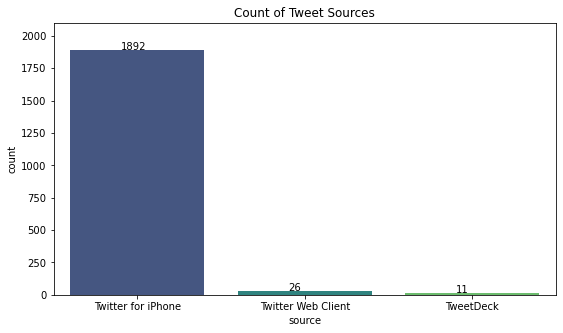

In [92]:
#here we want to have aplot of twitter sources used in order to establish the most popular
fig, ax = plt.subplots(figsize = (9,5))
ax = sns.countplot(x = "source", data = df, order=df.source.value_counts().iloc[:10].index, palette = "viridis",)
ax.set_title("Count of Tweet Sources");

ax.set_ylim(0, 2100)
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+2))

#### 2. Tweets and Re-tweets over time:
> This section will aim to look at the overall frequency of tweets and re-tweets over time:

In [93]:
df.timestamp = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M:%S.%f')

monthly_tweets = df.groupby(pd.Grouper(key = 'timestamp', freq = "M")).count().reset_index()
monthly_tweets = monthly_tweets[['timestamp', 'tweet_id']]
monthly_tweets.head()
monthly_tweets.sum()

C:\Users\calvi\AppData\Local\Temp\ipykernel_14044\788664054.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  monthly_tweets.sum()


tweet_id    1929
dtype: int64

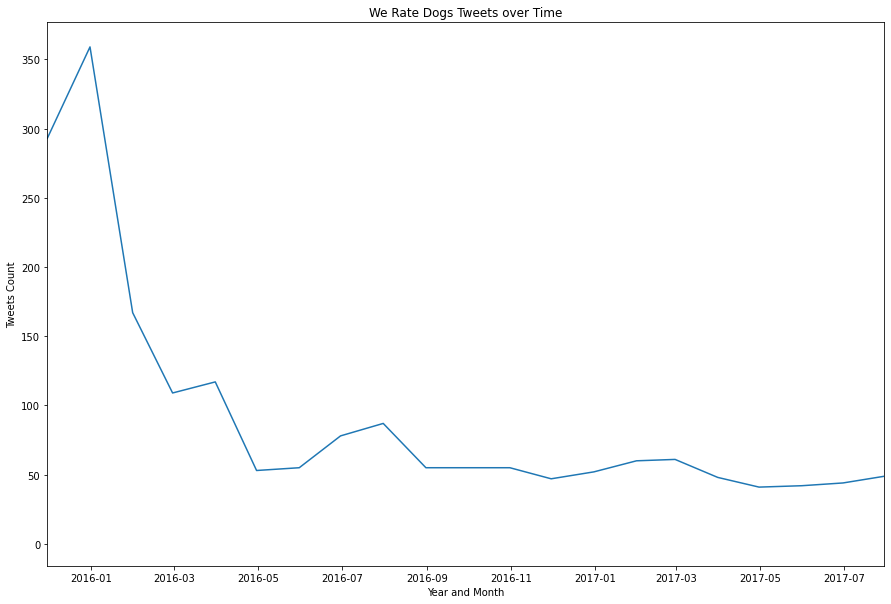

In [94]:
# Plotting time vs. tweets

import datetime


plt.figure(figsize=(15, 10));
plt.xlim([datetime.date(2015, 11, 30), datetime.date(2017, 7, 30)]);

plt.xlabel('Year and Month')
plt.ylabel('Tweets Count')

plt.plot(monthly_tweets.timestamp, monthly_tweets.tweet_id);
plt.title('We Rate Dogs Tweets over Time');

#### `From the above line chart we can clearly see that the number of tweets generally reduced over time with spikes at certain times i.e in 2016 and afterwards a generally flatter curve onwards.` 
These spikes will be further illustrated in the figure below.

Retweets in my opinion show generally the overall interaction with a tweet. Therefore a plot of the retweets over time would generally show the overall interaction with the tweet across the years.

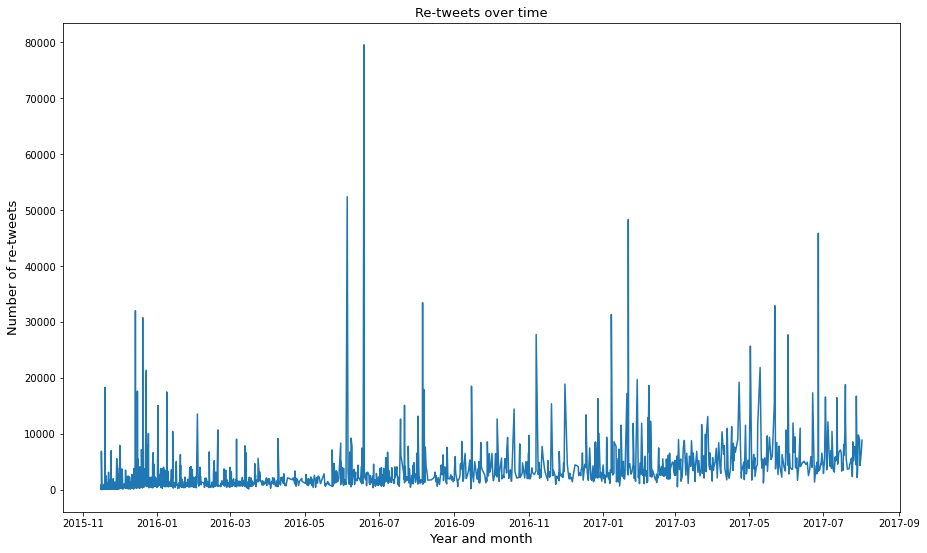

In [95]:
#Plotting retweets over time
sns.set_context()
plt.subplots(figsize=(15, 9))
plt.plot(df.timestamp, df.retweet_count)
plt.title('Re-tweets over time', color = 'black', fontsize = '13')
plt.xlabel('Year and month', color = 'black', fontsize = '13')
plt.ylabel('Number of re-tweets', color = 'black', fontsize = '13');

`The retweet activity has mainly been categorized by spikes across different times the reasons for which are beyond the scope of this study. These spikes were particularly of higher magnitude in the earlier dats of the tweet that is in 2016.`

#### 3. Retweets against Favourite Counts


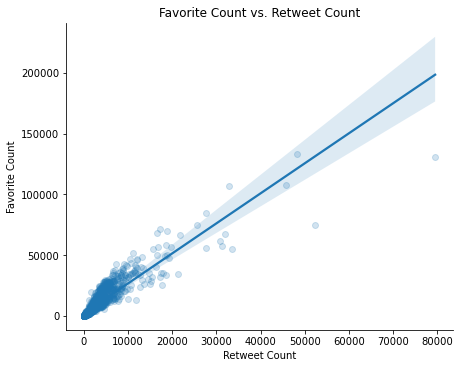

In [96]:
# Scatterplot of retweets vs favorite count

sns.lmplot(x="retweet_count", 
           y="favorite_count", 
           data=df,
           height = 5,
           aspect=1.3,
           scatter_kws={'alpha':1/5});

plt.title('Favorite Count vs. Retweet Count');
plt.xlabel('Retweet Count');
plt.ylabel('Favorite Count');

`As can be seen, there is a generally positive correlation between the Favourite count and the Retweet count.`

#### 4. Most Popular Dog Breed:

In [97]:
df['dog_type'].value_counts() # getting the  value counts for the dog breeds

pupper     218
doggo       69
puppo       27
floofer      3
Name: dog_type, dtype: int64

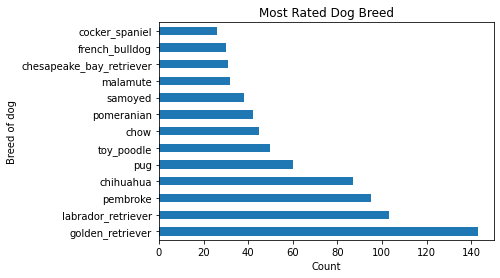

In [98]:
# Histogram to visualize dog breeeds
dog_breed = df.groupby('breed').filter(lambda x: len(x) >= 25)

dog_breed['breed'].value_counts().plot(kind = 'barh')
plt.title('Most Rated Dog Breed')
plt.xlabel('Count')
plt.ylabel('Breed of dog');

#### 5. Most Popular Dog Name:
In this section we seek to find the top 10 most popular dog names from the dataset and consequently plot a bar chat for the same:

In [99]:
# sorting a list of the top 10 most popular dog names:
popular_name=df.name.value_counts()[0:10]
popular_name

Charlie    11
Oliver     10
Cooper     10
Lucy       10
Tucker      8
Penny       8
Winston     8
Sadie       8
Daisy       7
Toby        7
Name: name, dtype: int64

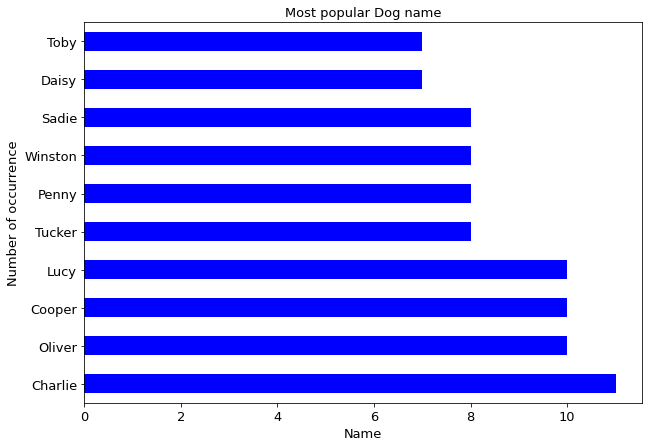

In [100]:
#plotting a bar graph to vizualize the 
g_bar = popular_name.plot.barh(color = 'blue', fontsize = 13)

#figure size(width, height)
g_bar.figure.set_size_inches(10, 7);

#Add labels
plt.title('Most popular Dog name', color = 'black', fontsize = '13')
plt.xlabel('Name', color = 'black', fontsize = '13')
plt.ylabel('Number of occurrence', color = 'black', fontsize = '13');

#### 6. Comparison of the 3 algorithms

In [103]:
# Function to plot a barchart.
def pop_dog(df_popular, gp_title, xlabel, ylabel,font = 14, font_title = 18):

    # Plotting only the breed's dog with more than 20 occurencies.
    df_popular[df_popular > 20].plot(kind = 'barh',      # Set the kind of graphic.
                                 figsize = [14, 6]); # Graphic size.
    plt.title(label = gp_title,         # Graphic Title.
              fontsize = 18);   # Graphic title fontsize.
    plt.xlabel(xlabel = xlabel,         # X axis label
               fontsize = 14);        # X axis fontsize
    plt.ylabel(ylabel = ylabel,         # Y axis label
               fontsize = 14);        # Y axis fontsize
    plt.xlim(0, 140)                    # X axis limit - set default as 140.

P1 Algorithm

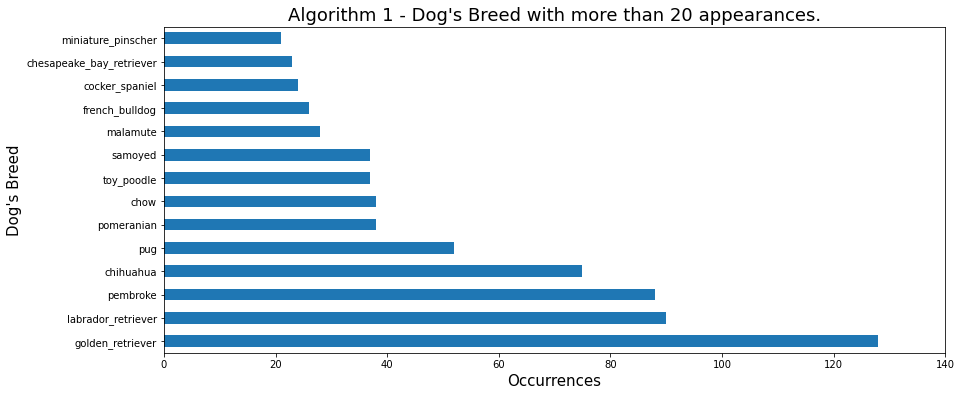

In [ ]:
# Value counts to build a histogram.
dog_pref = df[df.p1_dog].p1.value_counts()

# Plotting the graphic.
pop_dog(dog_pref,
           gp_title ='Algorithm 1 - Dog\'s Breed with more than 20 appearances.',
           xlabel = 'Occurrences',
           ylabel = 'Dog\'s Breed')

P2 Algorithm Visualization

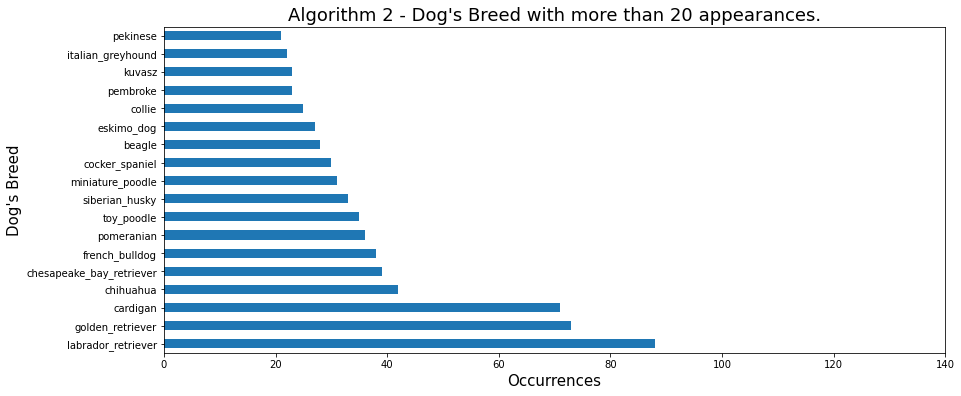

In [ ]:
# Value counts to build a histogram.
dog_pref = df[df.p2_dog].p2.value_counts()

# Plotting the graphic.
pop_dog(dog_pref,
           gp_title ='Algorithm 2 - Dog\'s Breed with more than 20 appearances.',
           xlabel = 'Occurrences',
           ylabel = 'Dog\'s Breed')

Algorithm 3 Visualizations:

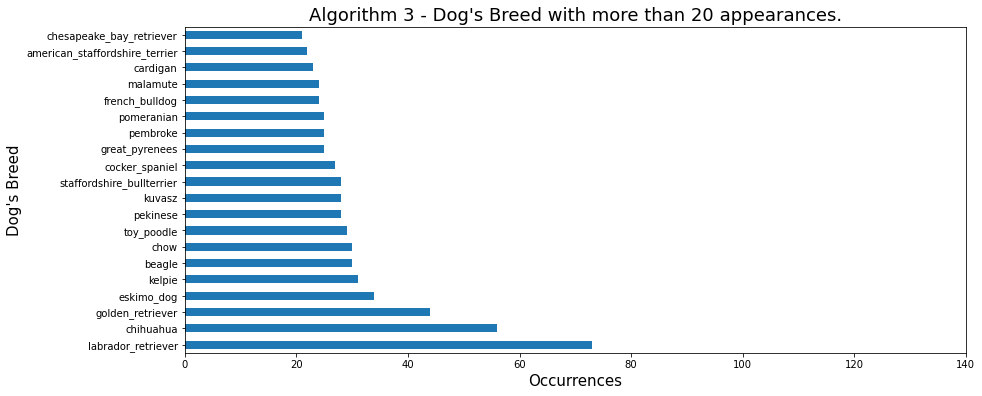

In [ ]:
# Value counts to build a histogram.
dog_pref = df[df.p3_dog].p3.value_counts()

# Plotting the graphic.
pop_dog(dog_pref,
           gp_title = 'Algorithm 3 - Dog\'s Breed with more than 20 appearances.',
           xlabel = 'Occurrences',
           ylabel = 'Dog\'s Breed')

## 6. Conclusions Drawn <a id='Conclusions Drawn'></a>
This project aims to perform the Data Wrangling and the Exploratory Data Analysis in the WeRateDogs™ Twitter account.

TThe write up offers a straight look at the data wrangling process. There is so much more that can be done with this data set. The analysis aimed to look majorly at the popularity of the various dog breeds and types.
he Data Gathering process involved three different tasks:
 * Download file from URL and Loading to the Jupyter Notebook
 * Downloading a file programmatically
 * Gathering data from the Twitter API.

Based on the data gathered, I have assessed the most evident issues and documented it to create a record of modifications. I then fixed all the issues identified and moved on to answering a few analysis questions. Befor that though I made a copy of the clean datasets and merged into a master csv file (twitter_archive_master.csv).





#### Additional Information

The Project also has other deliverables, which could be accessed by the following links:

[dog_rate]: https://twitter.com/dog_rates
Within the project folder there is a .txt file that contains references for this project.
The folder also contains the :
Act_report.pdf
Wrangle_report.pdf
wrangle_act.ipynb


## 7. References <a id='References'></a>

* https://www.geeksforgeeks.org/downloading-files-web-using-python/
* https://stackoverflow.com/questions/57270165/how-to-download-multiple-files-using-python-3-7
* https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id
* https://docs.tweepy.org/en/stable/authentication.html#twitter-api-v2
* https://stackoverflow.com/questions/38111125/typeerror-init-got-an-unexpected-keyword-argument-wait-on-rate-limit
* https://towardsdatascience.com/twitter-json-data-processing-3f353a5deac4
* https://stackoverflow.com/questions/54942467/loop-when-scraping-with-python
* https://stackoverflow.com/questions/12309269/how-do-i-write-json-data-to-a-file/12309296#12309296
* To print the length of a list: https://stackabuse.com/python-get-number-of-elements-in-a-list/
* String formatting: https://realpython.com/python-f-strings/ 
* Merging Datasets: https://pandas.pydata.org/docs/user_guide/merging.html
* https://stackoverflow.com/questions/44327999/python-pandas-merge-multiple-dataframes
* Extracting strings from urls:https://stackoverflow.com/questions/3075130/what-is-the-difference-between-and-regular-expressions
* https://stackoverflow.com/questions/17695662/extract-a-part-of-url-python 
* https://stackoverflow.com/questions/20602947/append-column-to-pandas-dataframe
* https://stackoverflow.com/questions/22245171/how-to-lowercase-a-python-dataframe-string-column-if-it-has-missing-values
* https://stackoverflow.com/questions/33179122/seaborn-countplot-with-frequencies
* https://stackoverflow.com/questions/32891211/limit-the-number-of-groups-shown-in-seaborn-countplot
* https://stackoverflow.com/questions/28931224/how-to-add-value-labels-on-a-bar-chart
* https://stackoverflow.com/questions/28931224/how-to-add-value-labels-on-a-bar-chart